To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup
Import data into Python environment.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

Reading CSV file

In [5]:
dset = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [6]:
dset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [7]:
dset[dset.isnull()].count()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [8]:
dset.describe(include='all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,359049,Comcast,24-06-15,24-Jun-15,1:29:58 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [9]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


Provide the trend chart for the number of complaints at monthly and daily granularity levels

In [10]:
dset['Date_month_year'] = pd.to_datetime(dset['Date_month_year'])
dset['Created_Month'] =  dset['Date_month_year'].apply(lambda x: x.month)
dset['Created_Day'] = dset['Date_month_year'].apply(lambda x: x.day)
dset['Created_Day of Week'] = dset['Date_month_year'].apply(lambda x: x.dayofweek)

In [11]:
ds_map = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
dset['Created_Day of Week']=dset['Created_Day of Week'].map(ds_map)
dset.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,22,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,4,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,18,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,7,5,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,5,26,Tue


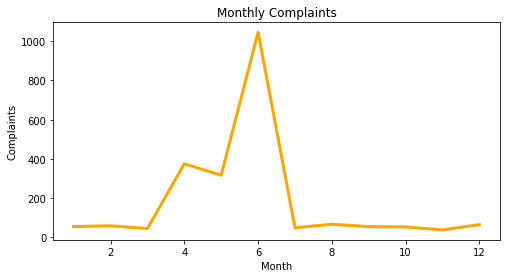

In [12]:
import seaborn as sns
plt.figure(figsize=(8,4))
monthly = dset.groupby('Created_Month').count().reset_index()
lp = sns.lineplot(x='Created_Month', y= 'Customer Complaint', data = monthly, color = 'orange', linewidth=3)
plt.title('Monthly Complaints')
plt.xlabel('Month')
plt.ylabel('Complaints')
plt.show()

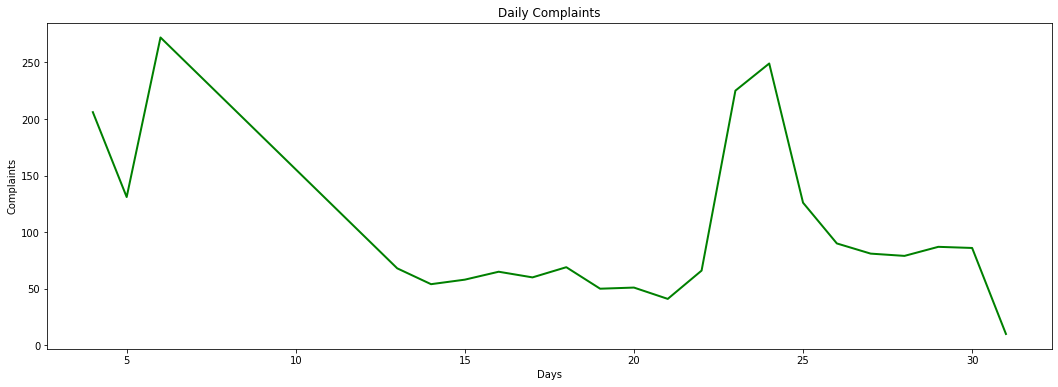

In [13]:
plt.figure(figsize=(18,6))
daily = dset.groupby('Created_Day').count().reset_index()
lp = sns.lineplot(x='Created_Day', y= 'Customer Complaint', data = daily, color = 'green', linewidth=2)
plt.title('Daily Complaints')
plt.xlabel("Days")
plt.ylabel("Complaints")
plt.show()

In [14]:
dset['Customer Complaint'] = dset['Customer Complaint'].str.title() 
Comp_freq = dset['Customer Complaint'].value_counts()
Comp_freq

Comcast                                                                         102
Comcast Data Cap                                                                 30
Comcast Internet                                                                 29
Comcast Data Caps                                                                21
Comcast Billing                                                                  18
                                                                               ... 
Inability To Get Access To Internet Through Comcast Or At&T                       1
Comcast Las Cruces New Mexico                                                     1
Service Not Disconnected As Requested. Overcharged And Overpaid As A Result.      1
Comcast Not Honoring Agreement                                                    1
Comcast Extended Outages                                                          1
Name: Customer Complaint, Length: 1740, dtype: int64

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed

In [15]:
dset['Highlevel_Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in dset["Status"]]

In [16]:
dset['Highlevel_Status'].unique()

array(['Closed', 'Open'], dtype=object)

Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [19]:
dset['State'] = dset['State'].str.title() 
state = dset.groupby(['State','Highlevel_Status']).size().unstack().fillna(0)

In [20]:
state

Highlevel_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


Which state has the maximum complaints


In [21]:
dset.groupby(["State"]).size().sort_values(ascending=False).to_frame().rename({0: "Complaint count"}, axis=1)[:1]

,Complaint count
State,
Georgia,288


In [22]:
Comp = dset.groupby(["State","Highlevel_Status"]).size().unstack().fillna(0)
Comp.sort_values('Closed',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open
State,,
Georgia,208.0,80.0


Which state has the highest percentage of unresolved complaints

In [23]:
Comp['Resolved_comp_prcnt'] = Comp['Closed']/Comp['Closed'].sum()*100
Comp['Unresolved_comp_prcnt'] = Comp['Open']/Comp['Open'].sum()*100

In [24]:
Comp.sort_values('Unresolved_comp_prcnt',axis = 0,ascending=False)[:1]

Highlevel_Status,Closed,Open,Resolved_comp_prcnt,Unresolved_comp_prcnt
State,,,,
Georgia,208.0,80.0,12.18512,15.473888


Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [25]:
res = dset.groupby(['Received Via','Highlevel_Status']).size().unstack().fillna(0)
res['resolved'] = res['Closed']/res['Closed'].sum()*100
res['resolved']

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: resolved, dtype: float64